In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
import numpy as np

In [20]:
#Reading the data
user_data = sc.textFile('data/ml-100k/u.user')
user_data.first()

u'1|24|M|technician|85711'

In [21]:
# Foreach line, splitting at key "|", Also we just converted it into RDDs
user_fields = user_data.map(lambda line: line.split("|"))
user_fields

PythonRDD[35] at RDD at PythonRDD.scala:43

In [22]:
num_users = user_fields.map(lambda fields: fields[0]).count()
num_genders = user_fields.map(lambda fields: fields[2]).distinct().count()
num_occupations = user_fields.map(lambda fields: fields[3]).distinct().count()
num_zipcodes = user_fields.map(lambda fields: fields[4]).distinct().count()
print "Users: %d, Genders: %d, Occupations: %d, Zipcodes: %d" % (num_users, num_genders, num_occupations, num_zipcodes)

Users: 943, Genders: 2, Occupations: 21, Zipcodes: 795


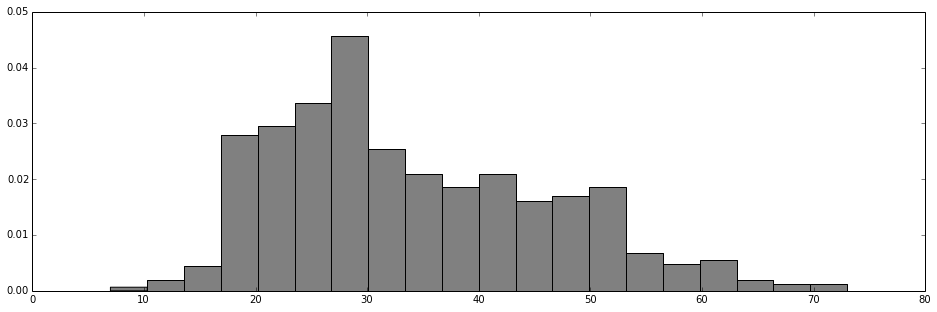

In [23]:
# Collecting all ages as integers and plotting them
ages = user_fields.map(lambda fields: int(fields[1])).collect()
hist(ages, bins=20, color='grey', normed=True)
fig = plt.gcf()
fig.set_size_inches(16, 5) #(width, height) of whole plot

In [24]:
# Mapping each person's occupation and reducing to find total no. of a particular occupation
count_by_occupation = user_fields.map(lambda fields: (fields[3], 1)).reduceByKey(lambda x, y: x+y).collect()

In [25]:
# Loading key-value pairs from above into x-axis= all keys and y-axis = all values
x_axis1 = np.array([c[0] for c in count_by_occupation])
y_axis1 = np.array([c[1] for c in count_by_occupation])
# Sorting the values to see them in an uniform way
x_axis = x_axis1[np.argsort(y_axis1)]
y_axis = y_axis1[np.argsort(y_axis1)]

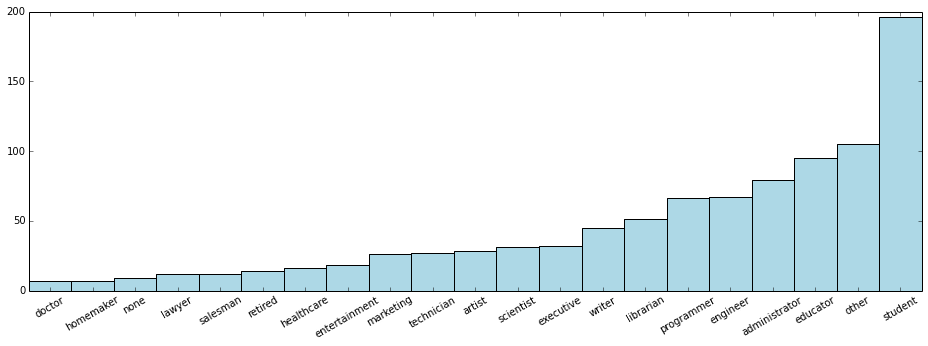

In [26]:
pos = np.arange(len(x_axis))
width = 1.0

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x_axis)

plt.bar(pos, y_axis, width, color='lightblue')
plt.xticks(rotation=30)
fig = plt.gcf()
fig.set_size_inches(16, 5)

In [27]:
# Another of way doing some of previous steps
count_by_occupation2 = user_fields.map(lambda fields: fields[3]).countByValue()
print "Map-Reduce Approach:-"
print dict(count_by_occupation)
print "Count by value approach:-"
print dict(count_by_occupation2)

Map-Reduce Approach:-
{u'administrator': 79, u'writer': 45, u'retired': 14, u'lawyer': 12, u'doctor': 7, u'marketing': 26, u'executive': 32, u'none': 9, u'entertainment': 18, u'healthcare': 16, u'scientist': 31, u'student': 196, u'educator': 95, u'technician': 27, u'librarian': 51, u'programmer': 66, u'artist': 28, u'salesman': 12, u'other': 105, u'homemaker': 7, u'engineer': 67}
Count by value approach:-
{u'administrator': 79, u'retired': 14, u'lawyer': 12, u'healthcare': 16, u'marketing': 26, u'executive': 32, u'scientist': 31, u'student': 196, u'technician': 27, u'librarian': 51, u'programmer': 66, u'salesman': 12, u'homemaker': 7, u'engineer': 67, u'none': 9, u'doctor': 7, u'writer': 45, u'entertainment': 18, u'other': 105, u'educator': 95, u'artist': 28}
